In [2]:
#import modules
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
df = pd.read_csv('/Users/evenandrekarlsen/Documents/GitHub/DAVE3625-24H/Lab2/data/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

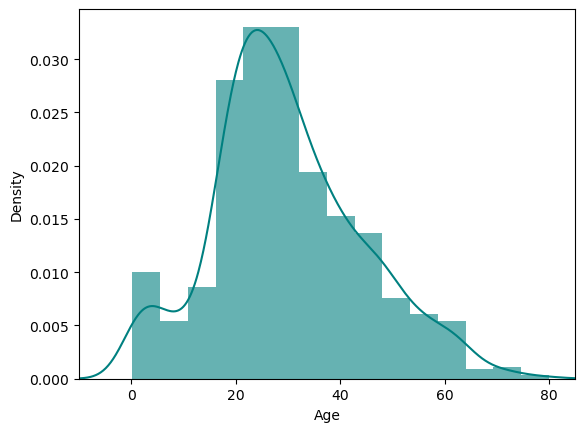

In [8]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


In [10]:
# mean age
print('Mean of "Age" is %.2f' %(df["Age"].mean(skipna=True)))
# median age
print('Median of "Age" is %.2f' %(df["Age"].median(skipna=True)))


Mean of "Age" is 29.88
Median of "Age" is 28.00


In [11]:
#Fill missing values - we'll use the median since the data is right skewed.
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

In [12]:
df["HasCabin"] = df.Cabin.isnull()

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [14]:
# percent of missing "Cabin" 
print('Percent missing in "Cabin" column: %.2f%%' %((df['Cabin'].isnull().sum()/df.shape[0])*100)) 


Percent missing in "Cabin" column: 77.46%


In [21]:
import re
df["Title"] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)) 

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/53/c475jdwd0m74dv3x77vvmvzh0000gn/T/ipykernel_15724/4171261351.py:2: SyntaxWarning: invalid escape sequence '\.'
  df["Title"] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))


In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,Mr


In [24]:
df["Title"].value_counts() 
# with the name of the column you want to count

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

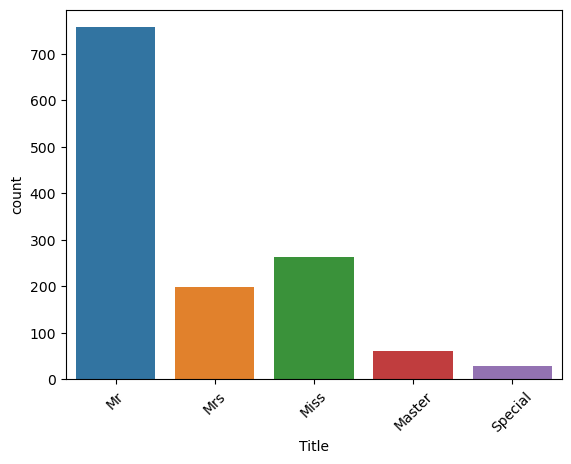

In [25]:
df["Title"] = df["Title"].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
df["Title"] = df["Title"].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=df, hue='Title');
plt.xticks(rotation=45);

In [26]:
df['CatAge'] = pd.qcut(df["Age"], q=4, labels=False )
df['CatFare'] = pd.qcut(df["Fare"], q=4, labels=False )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title,CatAge,CatFare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,Mr,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,Mrs,3,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,Mrs,2,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,Mr,2,1


In [27]:
df = df.drop(['Age', 'Fare', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,HasCabin,Title,CatAge,CatFare
0,1,0.0,3,male,1,0,S,True,Mr,0,0
1,2,1.0,1,female,1,0,C,False,Mrs,3,3
2,3,1.0,3,female,0,0,S,True,Miss,1,1
3,4,1.0,1,female,1,0,S,False,Mrs,2,3
4,5,0.0,3,male,0,0,S,True,Mr,2,1


In [28]:

# Converting to binary values
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,1,0.0,3,1,0,True,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,False,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,True,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,False,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,True,2,1,True,False,True,False,True,False,False


In [29]:
df_dum.to_csv('data/Titanic_Cleaned.csv', index=False)